In [132]:
!pip install scikit-learn

In [133]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [134]:
!pip install numpy

In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [136]:
df=pd.read_csv('KNN.csv')
df.head()

,age,income
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     10 non-null     int64
 1   income  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [138]:
df.isnull().sum()

age       0
income    0
dtype: int64

In [139]:
df.head(9)

,age,income
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65
5,21,62
6,25,65
7,30,70
8,31,68


In [141]:
df.tail(4)

,age,income
6,25,65
7,30,70
8,31,68
9,22,59


In [142]:
df.age

0    21
1    20
2    22
3    22
4    23
5    21
6    25
7    30
8    31
9    22
Name: age, dtype: int64

In [143]:
df.income

0    60
1    55
2    60
3    61
4    65
5    62
6    65
7    70
8    68
9    59
Name: income, dtype: int64

In [144]:
df.shape

(10, 2)

In [145]:
df.corr()

,age,income
age,1.000000,0.885564
income,0.885564,1.000000


Text(0, 0.5, 'income')

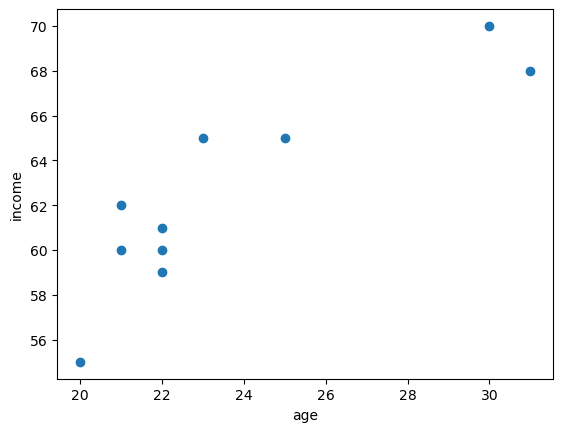

In [146]:
plt.scatter(df.age,df.income)
plt.xlabel('age')
plt.ylabel('income')

In [147]:
df.age.mean()

23.7

In [148]:
df.income.mean()

62.5

In [149]:
x=df.drop('income',axis=1)
x.head()

,age
0,21
1,20
2,22
3,22
4,23


In [151]:
y=df.drop('age',axis=1)
y.head()

,income
0,60
1,55
2,60
3,61
4,65


In [152]:
from sklearn.model_selection import train_test_split as tts

In [153]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.20, random_state=0)

In [154]:
xtrain.head()

,age
4,23
9,22
1,20
6,25
7,30


In [155]:
xtrain.shape

(8, 1)

In [156]:
ytrain.shape

(8, 1)

In [157]:
xtest.shape

(2, 1)

In [158]:
ytest.shape

(2, 1)

In [159]:
xtest.head()

,age
2,22
8,31


In [171]:
ytest.tail()

,income
2,60
8,68


## Linear Regression apply

In [195]:
from sklearn.linear_model import LinearRegression

In [197]:
reg= LinearRegression()

In [199]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [201]:
reg.coef_ # m

array([[1.26388889]])

In [203]:
reg.intercept_ #c

array([33.05555556])

In [205]:
reg.predict([[22]])

array([[60.86111111]])

In [207]:
reg_y_pred=reg.predict(xtest)

In [209]:
reg_y_pred

array([[60.86111111],
       [72.23611111]])

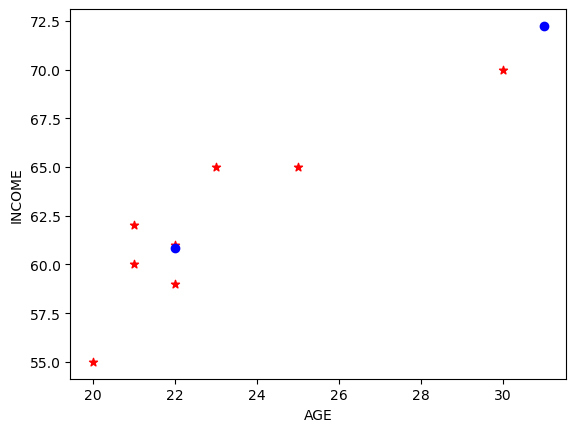

In [211]:
plt.scatter(xtrain,ytrain,marker='*',color='red')
plt.scatter(xtest,reg_y_pred,color='blue')
plt.xlabel('AGE')
plt.ylabel('INCOME')
plt.show()


## Mean Squared Error (MSE)

In [214]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [216]:
mse=mean_squared_error(ytest,reg_y_pred)
mse

9.343074845679022

## Accurecy

In [219]:
reg.score(xtest,ytest)

0.41605782214506115

In [246]:
reg.score(xtrain,ytrain)

0.7938836161441857

## KNN

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [251]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=3)

In [253]:
knn_regressor.predict([[22]])

array([[61.66666667]])

In [255]:
knn_y_pred = knn_regressor.predict(xtest)

In [257]:
knn_y_pred

array([[61.66666667],
       [66.66666667]])

## Mean Squared Error (MSE)

In [260]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [262]:
mse = mean_squared_error(ytest, knn_y_pred)
mse

2.2777777777777675

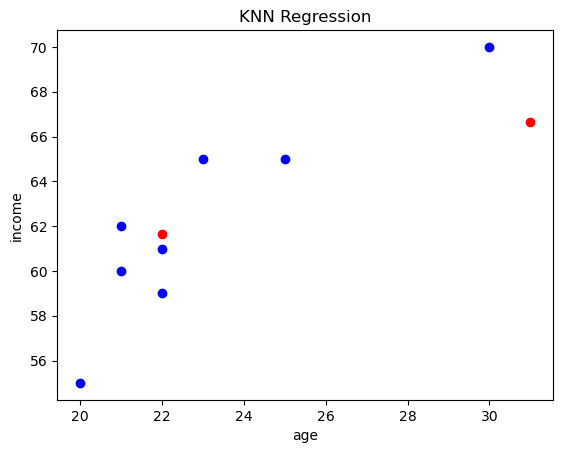

In [264]:
plt.scatter(xtrain, ytrain, color='blue')
plt.scatter(xtest, knn_y_pred, color='red')
plt.title('KNN Regression')
plt.xlabel('age')
plt.ylabel('income')
plt.show()

In [266]:
knn_regressor.score(xtest,ytest)

0.8576388888888895

In [268]:
knn_regressor.score(xtrain,ytrain)

0.6364682197296523

## compare the predicted outcomes (knn with linearregression)

Text(0, 0.5, 'ACCURACY')

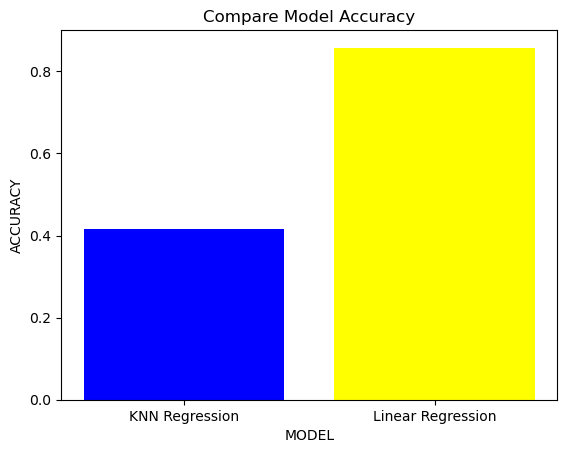

In [271]:
model_names = ['KNN Regression','Linear Regression']
accuracy_values = [reg.score(xtest,ytest),knn_regressor.score(xtest,ytest)]
plt.bar (model_names, accuracy_values, color= ['BLUE','yellow'])
plt.title('Compare Model Accuracy')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')